# Fun with Sympy :
# Plotting cubic polynomials and finding the zeros of their derivatives

Working through the Symbol, Derivative, and solve methods to approach a toy problem - given a cubic polynomial with constants provided by the user, plot its form and show where the slopes are zero given its first derivative.

Complex roots (when the quadratic formula tries to take the square root of a negative number) are not plotted here, only real-number roots.

Enter data for polynomial in form ax^3 + bx^2 + cx + d with x ranges and tolerance.
Cubic term coefficient a (default: -1.5):

Squared term coefficient b (default: -12.3):

First-power term coefficient c (default: 6):

Constant term d (default: 500):

Bottom of x domain (default: -10):

Top of x domain (default: 10):

Derivative of Cubic equation is:
       2               
- 4.5⋅x  - 24.6⋅x + 6.0
The real roots of the cubic derivative are x = -5.701 and x = 0.234


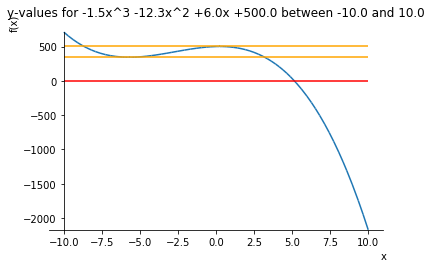

In [7]:
# -*- coding: utf-8 -*-
"""
Fun with sympy (Thanks to "Doing Math With Python, Amit Saha, ISBN 978-1-59327-640-9)
A take on Challenge 2, p. 55 USING sympy
Also thanks to tutorials and examples at www.sympy.org

Created on Tue Jan  9 16:26:13 2019
@author: Chris Austin
"""
from sympy import Symbol, plot, Derivative, pprint, solve
from sympy.plotting import plot_parametric

# Set default values
a,b,c,d,low,high = (-1.5, -12.3, 6, 500, -10, 10)

try:
    print("Enter data for polynomial in form ax^3 + bx^2 + cx + d with x ranges and tolerance.")
    a = float(input("Cubic term coefficient a (default: %s):\n" % a) or a)
    b = float(input("Squared term coefficient b (default: %s):\n" % b) or b)
    c = float(input("First-power term coefficient c (default: %s):\n" % c) or c)
    d = float(input("Constant term d (default: %s):\n" % d) or d)
    low = float(input("Bottom of x domain (default: %s):\n" % low) or low)
    high = float(input("Top of x domain (default: %s):\n" % high) or high)
        
except ValueError:
    print('You entered an invalid input')
else:
    x = Symbol('x')
    polyCubic = a*x**3 + b*x**2 + c*x + d
      
    # The smallest y-value for positioning the axes of the plot doesn't necessarily 
    # have to happen at the low or high of the x ranges.
    yExtremes = (polyCubic.subs(x, high), polyCubic.subs(x, low))
        
    p = plot(polyCubic, (x, low, high), axis_center = (low, min(yExtremes)),
        title = "y-values for {0}x^3 {1:+}x^2 {2:+}x {3:+} between {4} and {5}".format(a,b,c,d,low,high),
        show = False)

        # Determine derivative of equation and if roots are non-complex and can be plotted 
    dx =Derivative(polyCubic, x)
    dxSoln = dx.doit()        
    print("Derivative of Cubic equation is:")
    pprint(dxSoln, use_unicode = True)
        
    roots = solve(dxSoln)
    if isinstance(roots, complex):
        print("Roots of the derivative have components in the complex plane (a + bi).")
    else:
        point1 = polyCubic.subs(x, roots[0])
        point2 = polyCubic.subs(x, roots[1])          
        print("The real roots of the cubic derivative are x = {0:.3f} and x = {1:.3f}".format(roots[0], roots[1]))
        p2 = plot_parametric(x, 0, line_color = 'red', show = False)
        p3 = plot_parametric(x, point1, line_color = 'orange', show = False)
        p4 = plot_parametric(x, point2, line_color = 'orange', show = False)
        p.append(p2[0])
        p.append(p3[0])
        p.append(p4[0])
        p.show()

It's a little easier to customize the plotting in matplotlib - Here's another version where sympy wasn't used...

Enter data for polynomial in form ax^3 + bx^2 + cx + d with x ranges and tolerance.
Cubic term coefficient a (default: -1.5):

Squared term coefficient b (default: -12.3):

First-power term coefficient c (default: 6):

Constant term d (default: 500):

Bottom of x domain (default: -10):

Top of x domain (default: 10):

Domain increment for x (default: 0.01):

Cubic Derivative is -4.50x^2 -24.60x +6.00
Real roots exist fot the cubic derivative.
The real roots of the cubic derivative are x = -5.701 and x = 0.234


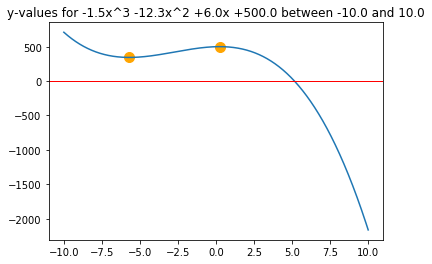

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jan  5 21:58:07 2019

Thanks to "Doing Math With Python, Amit Saha, ISBN 978-1-59327-640-9
A take on Challenge 2, p. 55 WITHOUT using sympy

@author: caust
"""
from matplotlib import pyplot as plt

def polynom(xvalues,a,b,c,d):
    y = []
    for x in xvalues:
        y.append(a*x**3 + b*x**2 + c*x + d)
    return y

def plotit(a,b,c,d,low,top, increment):
    # create points for plotting in the x domain with a list comprehension
    xDomain = [x*increment for x in range(int(low/increment), int(top/increment))]
    yDomain = polynom(xDomain,a,b,c,d)
    plt.plot(xDomain, yDomain)
    plt.title("y-values for {0}x^3 {1:+}x^2 {2:+}x {3:+} between {4} and {5}".format(a,b,c,d,low,top))

    # Highlight y=0 with a red line
    plt.axhline(color = 'red', linestyle = '-', linewidth = 1.0)
    
    aPrime, bPrime, cPrime = polyDerivative(a,b,c)
    print("Cubic Derivative is {0:.2f}x^2 {1:+.2f}x {2:+.2f}".format(aPrime,bPrime,cPrime))

    # see if there are complex roots out of the cubic derivative using the quadratic equation - 
    # (-bPrime +- sqrt(bPrime^2 - 4 * aPrime * cPrime)) / 2 * aPrime
    # occurs in the sqrt() component when (bPrime^2 - 4 * aPrime * cPrime) is negative.
    if (bPrime**2 - (4*aPrime*cPrime)) < 0:
        print("Roots of the derivative have components in the complex plane (a + bi).")
    else:
        print("Real roots exist fot the cubic derivative.")
        roots = polyRoots(aPrime, bPrime, cPrime)
        print("The real roots of the cubic derivative are x = {0:.3f} and x = {1:.3f}".format(roots[0], roots[1]))
        plt.scatter(x=roots[0], y= a*roots[0]**3 + b*roots[0]**2 + cPrime*roots[0] + d, c = "orange", s = 100)
        plt.scatter(x=roots[1], y= a*roots[1]**3 + b*roots[1]**2 + cPrime*roots[1] + d, c = "orange", s = 100)
    
def polyDerivative(a,b,c):
    return (3*a, 2*b, c)

def polyRoots(a,b,c):
    root1 = (-b + (b**2 - (4*a*c))**0.5)/(2*a)
    root2 = (-b - (b**2 - (4*a*c))**0.5)/(2*a)
    return root1, root2
    
# Set default values
a,b,c,d,low,top,increment = (-1.5, -12.3, 6, 500, -10, 10, .01)

try:
    print("Enter data for polynomial in form ax^3 + bx^2 + cx + d with x ranges and tolerance.")
    a = float(input("Cubic term coefficient a (default: %s):\n" % a) or a)
    b = float(input("Squared term coefficient b (default: %s):\n" % b) or b)
    c = float(input("First-power term coefficient c (default: %s):\n" % c) or c)
    d = float(input("Constant term d (default: %s):\n" % d) or d)
    low = float(input("Bottom of x domain (default: %s):\n" % low) or low)
    top = float(input("Top of x domain (default: %s):\n" % top) or top)
    increment = float(input("Domain increment for x (default: %s):\n" % increment) or increment)
except ValueError:
    print('You entered an invalid input')
else:
    plotit(a,b,c,d,low,top, increment)
    plt.show()